<div align="right">
<table style="width:50%">
  <tr>
    <th>Hazırlayan</th>
    <th>Versiyon</th> 
    <th>Tarih</th> 
    <th>Dil</th>
  </tr>
  <tr>
    <td>dataFLOYD</td>
    <td>v1.00</td> 
    <td>19 Eyl 2018</td>
    <td>TR </td>
  </tr>
</table>
</div>

# SVM (Support Vector Machines) - Karar Destek Makineleri 1. Bölüm

SVM (Support Vector Machines), yani Türkçe adıyla **Karar Destek Makineleri** oldukça popüler bir makine öğrenmesi algoritmasıdır. 

SVM aslında "Perceptron" algoritmasına çok benzer. "Perceptron" algoritmasındaki ağırlıkların ayarlanmasında temel kriter **sınıflandırma hatalarının** minimize edilmesidir. SVM'deki temel minimize edilmesi istenen kriter, daha doğrusu maksimize edilmesi gereken ktiriter **"marjin"** (margin) dir.

Bu aşamada **marjin** nasıl tanımlanır isterseniz biraz ona bakalım. Bunun için bu işin "devlerinden" biraz yardım alalım ve onların omuzları üzerinde yükselelim! *(Ref: Machine Learning: An Algorithmic Perspective, Marshland, 2014)*

------------------

## Hangi doğrusal sınıflandırıcı daha iyi?

![image1.png](image1.png)

Yukarıdaki şekilde iki farklı sınıf için üç adet sınıflandırıcı çizgisi mevcut.

"Perceptron" algoritmasını kullanmış olsaydık, eğitim sonunda bu üç sınıflandırıcıdan herhangi birine sahip olabilirdik. Çünkü "perceptron" yukarıda da bahsettiğimiz gibi sadece **sınıflandırma hatalarını** minimize etmeye uğraşır.

**Peki size bir soru:** Bir sınıflandırıcı yapacak olsanız bu üçünden hangisini seçerdiniz?

Sizi yönlendirmek gibi olmasın ama şekillere bakınca *en güzel çizgi sanki ortadaymış* gibi geliyor :)

**Bunun sebebi nedir?** Ben söyleyeyim çünkü ortadaki çizgi **sınır bölgesindeki marjini maksimize** etmektedir.  

## Marjin sayısal olarak nasıl ifade edilir?

İnsanlar genelde matematik denklemleri yoğun bir yazı gördüğünde hemen  orayı terketmek ister, bu sebeple olabilidiğince az denklem kullanarak anlatmaya çalışacağım.

 ![image2_1.png](image2_1.png)

M ile gösterilen uzunluğu "marjin" olarak ifade edebiliriz. Biraz daha resmi bir tanım vermeyi deneyeyim.

**Marjin (Margin):** Karar sınırı ile herhangi bir örnek arasında tanımlanan en kısa uzaklık. 

Karar sınırı ile en kısa mesafeye sahip örneklere de **destek vektörleri (support vectors)** denilmektedir.

Marjini maksimize ettiğimiz zaman **daha iyi bir genelleştirme** elde ederiz.

------------------

### Hiperdüzlem (Hyperplane) nedir?

![image2_2.png](image2_2.png)

**Nasıl terimler bunlar, neler oluyor?** dediğinizi duyar gibiyim. Bazı kavramları düzgün açıklayabilmek için önce bunu vermenin iyi olacağını düşündüm. Neyse ki ISLR'yi *(Ref: An Introduction to Statistical Learning)* yazan bilge kişiler bunu daha önceden düşünmüş. Oradan yararlanarak bu konsepti biraz anlatmaya çalışacağım.

İki boyutlu bir örnek üzerinden gidecek olursak bir hiper uzay aslında bir doğrudur. Doğruyu da $w^Tx+b=0$ şeklinde genel bir formülle ifade etmek mümkün.

![image3_1.png](image3_1.png)

Bu şekilde $1+2X_1+3X_2=0$ doğrusu gösterilmekte. Bu bir doğrudur. Mavi ve kırmızı bölgeyi aşağıdaki gibi ifade edersek bunu bir sınıflandırıcıya dönüştürmüş oluruz.
$$1+2X_1+3X_2>0$$ 
$$1+2X_1+3X_2<0$$ 
*Not: ISLR kitabının yazarları bunu sallamayacak biliyorum :) ama bu şekilde bölgeler belli olmuyordu ve isimleri farklıydı o yüzden şeklin üzerine yazı ekledim*

Burada nasıl vektör olarak ifade edebiliriz bunları derseniz karar sınırı için şu şekilde bir yazım olabilir. 
\begin{equation*}
1 + \begin{bmatrix} 2 \ 3 \end{bmatrix}
\begin{bmatrix} X_1 \\ X_2 \end{bmatrix} = 0
\end{equation*}

## Maksimum marjin nasıl bulunur?

Şimdi bir toparlayalım elimizde iki adet hiperdüzlem mevcut ve bunlar için en büyük M değerini bulmak istiyoruz. Yani:

$$ w^Tx+b \ge M $$
$$ w^Tx+b \le -M $$

Hedef sınıfı $t_i$ ile ifade ettiğimizi düşünürsek çok da lafı uzatıp sizleri sıkmadan çözülmesi gereken denkleme gelmek istiyorum. Aşağıda kısıtı ve minimize yapılması gereken yeri yazıyorum.

$$ \frac{1}{2}w^Tw \ \ terimini \ en \ aza \ indir$$
$$ kısıtlar \ \ t_i(w_0 + w^Tx) \ge 1 \quad her \ i=1...n$$


Yukarıda bahsedilen denklemlerin çözümü bu yazının maksadını aşıyor. İlla ben bakacağım anlat derseniz sizi *Elements of Statistical Learning* kitabına yönlendirmem gerekiyor sanırım...

------------------

Lineer olarak ayrılamayan bazı durumlarda minimize edeceğimiz terime bir C parametresi eklenir. Buna **"soft-margin"** sınıflandırma denilmektedir. Bu durumda en aza indirilmesi gereken terim aşağıdaki gibi olur.

$$ \frac{1}{2}w^Tw + C(\sum_1^n \epsilon_i) $$

Yukarıdaki denklemden anlamamız gereken özetle şudur:
* Büyük C değerleri daha fazla hata fazla hata yapılabilmesine 
* Küçük C değerleri daha az hata yapılabilmesine olanak tanır.

*Sebastian Raschka'nın Python Machine Learning* kitabında durumu özetleyen güzel bir şekil var, onu aşağıya ekliyorum:

![image4_1.png](image4_1.png)

------------------

## Lineer durum için kodlama zamanı

Bu kadar teoriden sonra bir örnek yapalım isterseniz. Fakat unutmayın hala **"-lineer** durumu ele alıyoruz, yani iki boyutta bir çizgi oluşturabiliyoruz.

In [1]:
# Seaborn dark theme tercihimizdir :)
import seaborn as sns
sns.set_style("darkgrid")

import numpy as np
import matplotlib.pyplot as plt
# colormap kullanmak için
from matplotlib.colors import ListedColormap

In [2]:
%matplotlib notebook

In [3]:
# Biraz veri yaratalım
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=2,random_state=42, cluster_std=2)

<IPython.core.display.Javascript object>


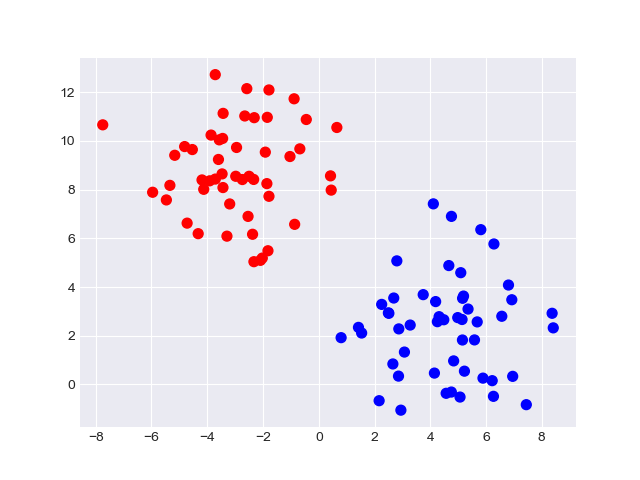

In [4]:
plt.figure()
# mavi ve kırmızı bir colormap olsun
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50,cmap=cm_bright);

In [5]:
# Sınıflandırıcıyı hazırlayalım
from sklearn.svm import SVC
svm = SVC(kernel="linear",C=1,random_state=42)

# verimize uygulayalım
# not: test ve train olarak ayırmıyoruz seti
svm.fit(X,y);

In [6]:
# datafloyd paketi
import sys
sys.path.append("..")
from datafloyd.plot import plot_decision_region, plot_svm_decision_region_2d

<IPython.core.display.Javascript object>


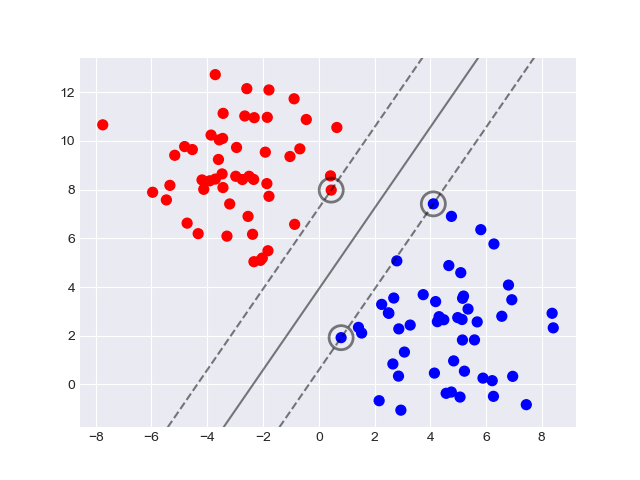

In [7]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50,cmap=cm_bright);
plot_svm_decision_region_2d(svm)

Grafikte destek vektörleri ve karar çizgisi görünmektedir. C değerini göreceli olarak büyük ayarladığımız ve veri seti lineer olarak ayrışabilir olduğu için yanlış sınıflandırılan örnek yok.

Bu serinin bir sonraki bölümünde lineer olmayan durumlarda ne yapılması gerek onları göreceğiz. Hoşçakalın!